In [1]:
#1
suppressWarnings(suppressMessages(library(rvest)))
suppressWarnings(suppressMessages(library(dplyr)))
suppressWarnings(suppressMessages(library(stringr)))
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(reshape2)))
suppressWarnings(suppressMessages(library(plotly)))

In [2]:
#2
#Two separate for loops look through scores before and after the extra point rule chance

Weeks= list() 

for (year in 2015:2021){
    
    yearlink = "https://www.espn.com/nfl/scoreboard/_/week/X/year/XXXX/seasontype/2"
    str_sub(yearlink,51,54) = year
    
    for (i in 1:15){
        
        link = yearlink
        str_sub(link,44,44) = i

        url = read_html(link)
        scores = url %>% html_nodes(".ttc , .pl2.n9") %>% html_text()

        dynamicVariableName = paste0("S",year,"W", i)
        assign(dynamicVariableName, scores)
        Weeks[[paste0("S",year,"W", i)]] = scores
    }
}

#-------------------------------------------------------------------------------------------#

oldWeeks= list()

for (year in 2008:2014){
    
    yearlink = "https://www.espn.com/nfl/scoreboard/_/week/X/year/XXXX/seasontype/2"
    str_sub(yearlink,51,54) = year
    
    for (i in 1:15){
        
        link = yearlink
        str_sub(link,44,44) = i

        url = read_html(link)
        scores = url %>% html_nodes(".ttc , .pl2.n9") %>% html_text()

        dynamicVariableName = paste0("S",year,"W", i)
        assign(dynamicVariableName, scores)
        oldWeeks[[paste0("S",year,"W", i)]] = scores
    }
}

In [3]:
#3
#Store all quarterly scores in one data frame

boxNums = data.frame(
    Home = numeric(),
    Away = numeric())

for (Y in 2015:2021){
    
    #Search through given week 
    for (W in 1:15){
        
        #Create string to search through Weeks list
        counter = paste0("S",Y,"W", W)
        
        #Create index for individual game scores
        indexA = which(Weeks[[counter]] == "away")
        indexH = which(Weeks[[counter]] == "home")

        #Search through each game in given week
        for(j in 1:length(indexA)) {  
            
            awayScores = c()
            homeScores = c()

            Q1a = as.numeric(Weeks[[counter]][[indexA[[j]]+1]])
            Q2a = Q1a + as.numeric(Weeks[[counter]][[indexA[[j]]+2]])
            Q3a = Q2a + as.numeric(Weeks[[counter]][[indexA[[j]]+3]])
            Q4a = Q3a + as.numeric(Weeks[[counter]][[indexA[[j]]+4]])

            Q1h = as.numeric(Weeks[[counter]][[indexH[[j]]+1]])
            Q2h = Q1h + as.numeric(Weeks[[counter]][[indexH[[j]]+2]])
            Q3h = Q2h + as.numeric(Weeks[[counter]][[indexH[[j]]+3]])
            Q4h = Q3h + as.numeric(Weeks[[counter]][[indexH[[j]]+4]])

            awayTeamScores = c(Q1a,Q2a,Q3a,Q4a);     
            homeTeamScores = c(Q1h,Q2h,Q3h,Q4h);

            awayScores = append(awayScores,awayTeamScores)
            homeScores = append(homeScores,homeTeamScores)

            newScores = data.frame(Home = homeScores,Away = awayScores)
            boxNums = rbind(boxNums,newScores);
        }
    }
}

#-------------------------------------------------------------------------------------------#

oldBoxNums = data.frame(
    Home = numeric(),
    Away = numeric())

for (Y in 2008:2014){
    
    #Search through given week 
    for (W in 1:15){
        
        #Create string to search through Weeks list
        counter = paste0("S",Y,"W", W)
        
        #Create index for individual game scores
        indexA = which(oldWeeks[[counter]] == "away")
        indexH = which(oldWeeks[[counter]] == "home")

        #Search through each game in given week
        for(j in 1:length(indexA)) {  
            
            awayScores = c()
            homeScores = c()

            Q1a = as.numeric(oldWeeks[[counter]][[indexA[[j]]+1]])
            Q2a = Q1a + as.numeric(oldWeeks[[counter]][[indexA[[j]]+2]])
            Q3a = Q2a + as.numeric(oldWeeks[[counter]][[indexA[[j]]+3]])
            Q4a = Q3a + as.numeric(oldWeeks[[counter]][[indexA[[j]]+4]])

            Q1h = as.numeric(oldWeeks[[counter]][[indexH[[j]]+1]])
            Q2h = Q1h + as.numeric(oldWeeks[[counter]][[indexH[[j]]+2]])
            Q3h = Q2h + as.numeric(oldWeeks[[counter]][[indexH[[j]]+3]])
            Q4h = Q3h + as.numeric(oldWeeks[[counter]][[indexH[[j]]+4]])

            awayTeamScores = c(Q1a,Q2a,Q3a,Q4a);     
            homeTeamScores = c(Q1h,Q2h,Q3h,Q4h);

            awayScores = append(awayScores,awayTeamScores)
            homeScores = append(homeScores,homeTeamScores)

            newScores = data.frame(Home = homeScores,Away = awayScores)
            oldBoxNums = rbind(oldBoxNums,newScores);
        }
    }
}

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


In [4]:
#4
#Define function to return last digit
lastNum = function(x){return(str_sub(x,-1))}

#Convert dataframe integers to characters and retrieve the trailing digit
boxNums = as.data.frame(sapply(boxNums, as.character)) 
oldBoxNums = as.data.frame(sapply(oldBoxNums, as.character))

#Convert dataframe cells to their lastNum equivalent
boxNums = data.frame(lapply(boxNums,lastNum))
oldBoxNums = data.frame(lapply(oldBoxNums,lastNum))

Saving 6.67 x 6.67 in image



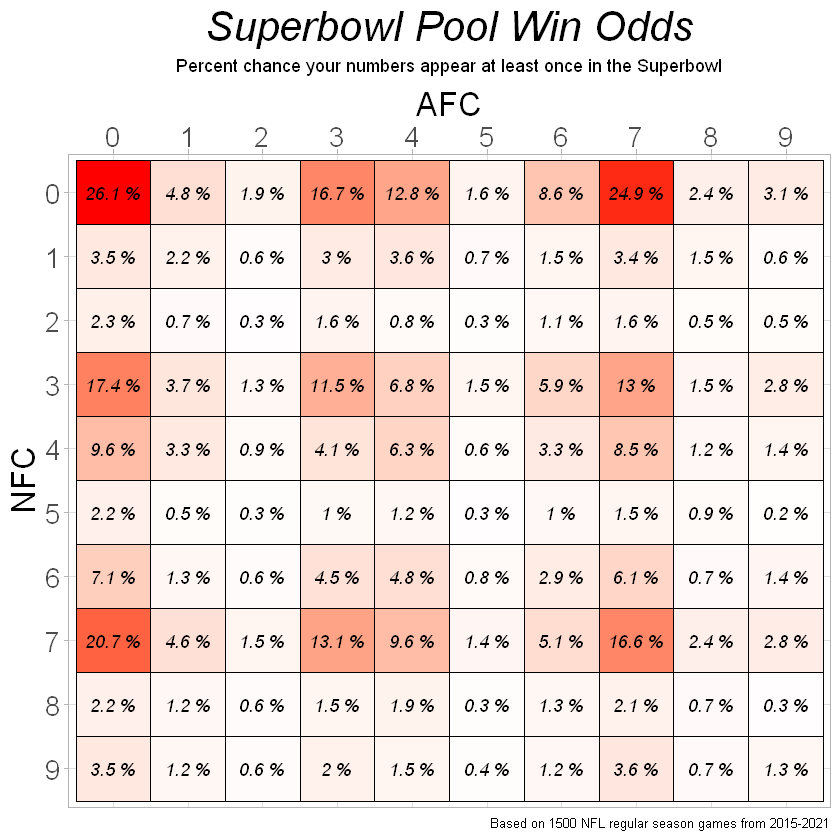

In [19]:
#Create plotting dataframe with Odds variable
plotBoxNums = as.data.frame(table(boxNums)) %>% mutate(Odds = round((1-((1 - (Freq/sum(Freq)))^4))*100,digits=1))

ggplot(plotBoxNums,aes(Home,Away,fill=Freq,text=Odds))+
    geom_tile(show.legend = FALSE,colour="black",size=.5)+
    theme_light()+
    xlab("AFC") + ylab("NFC")+
    scale_x_discrete(position = "top") + scale_y_discrete(limits = rev)+
    geom_text(aes(label = paste(round((1-((1 - (Freq/sum(Freq)))^4))*100,digits=1),'%'),fontface="italic"))+
    scale_fill_gradient2(low="white", mid="white",high="red", breaks=seq(0,nrow(plotBoxNums),10))+
    theme(axis.text=element_text(size=16),
          axis.title = element_text(size = 20),
          plot.title = element_text(hjust = 0.5,size=25,face="italic"),
          plot.caption=element_text(size=8),
          plot.subtitle = element_text(hjust=.5))+
    ggtitle("Superbowl Pool Win Odds")+
    labs(subtitle = "Percent chance your numbers appear at least once in the Superbowl",caption = "Based on 1500 NFL regular season games from 2015-2021")
    ggsave("Superbowl Pool Odds.png")

Saving 6.67 x 6.67 in image



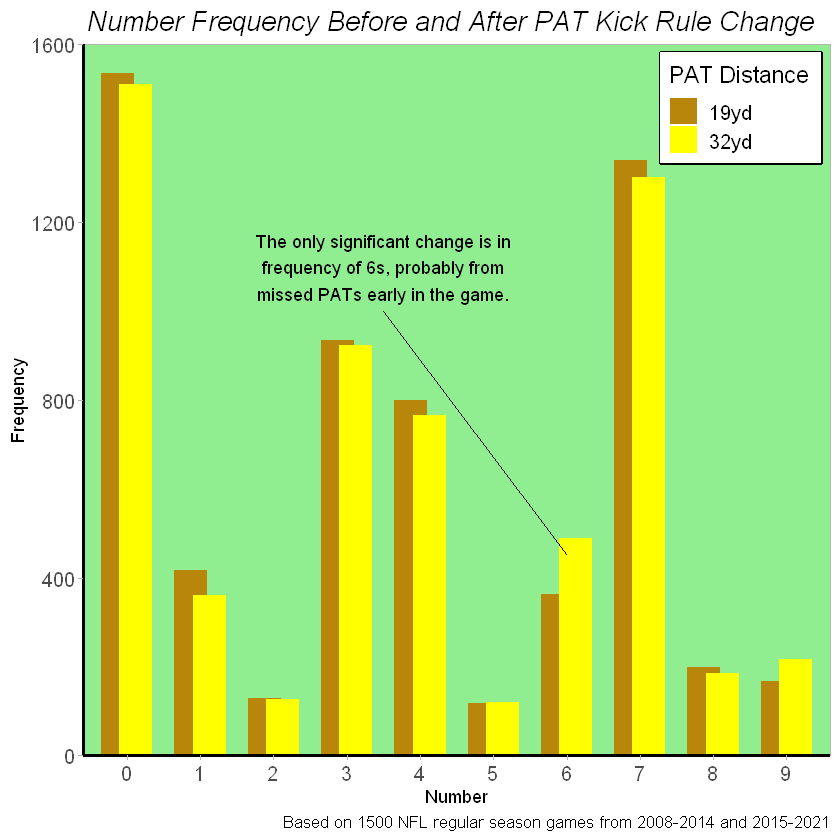

In [132]:
#Create dataframe for list of all values in given time frame
nums = data.frame(scores = unlist(boxNums)[1:6000])
oldNums = data.frame(scores = unlist(oldBoxNums)[1:6000])

#Create plotting dataframe from table to show  number frequencies 
plotNums = data.frame(Distance = factor("32yd"),table(nums)) 
plotOldNums = data.frame(Distance = factor("19yd"),table(oldNums)) %>% rename(nums=oldNums)

#Combine into one dataframe with PAT distance as factor
compNums = rbind(plotOldNums,plotNums)

#Create strings for plot text
annotation = "The only significant change is in\nfrequency of 6s, probably from\nmissed PATs early in the game."
plotT = "Number Frequency Before and After PAT Kick Rule Change"
plotCap = "Based on 1500 NFL regular season games from 2008-2014 and 2015-2021"

#Plot
ggplot(compNums, aes(nums, Freq, fill = Distance,)) +
    geom_bar(stat="identity", position = position_dodge(width=0.5))+
    theme_light()+
    labs(title = plotT,caption = plotCap)+
    xlab("Number") + ylab("Frequency")+
    scale_fill_manual("PAT Distance", values = c("19yd" = "darkgoldenrod", "32yd" = "yellow"))+
    scale_y_continuous(limits=c(0, 1600), expand = c(0, 0))+
    annotate("segment", x = 4.5, xend = 7, y = 1000, yend = 450) + annotate("text", x = 4.5, y = 1100, label = annotation)+
    theme(panel.background = element_rect(fill = "lightgreen", colour = "lightgreen"),
        panel.grid.major = element_line(colour = "lightgreen"), 
        panel.grid.minor = element_line(colour = "lightgreen"),
        axis.line = element_line(size = 1, colour = "black"),
        axis.text = element_text(size=12),
        legend.text = element_text(size=12),
        legend.title = element_text(size = 14),
        legend.position=c(.88,.91),
        legend.box.background = element_rect(colour = "black",size=1),
        plot.title = element_text(size=16,face="italic",hjust=.25),
        plot.caption = element_text(size=10))
    ggsave("PAT Rule Effect.png")

In [294]:
# Extra Code

#4
# Covert dataframe values back to numeric
# boxNums = as.data.frame(sapply(boxNums,as.numeric))
# oldBoxNums = as.data.frame(sapply(oldBoxNums,as.numeric))

#5
# numF = as.data.frame(table(boxNums))
# numF = numF %>% mutate(Odds = paste0('Your odds of winning a quarter are ',round((Freq/sum(Freq))*100,digits=1),'%'));numF
# heatmap(table(boxNums),Colv=NA,Rowv=NA,revC = TRUE)

#save plotly interactive plot
#htmlwidgets::saveWidget(plot, "SuperBowl Pool.html")

[1] 2056